# Hierarchical Clustering – Advanced Concepts, Theory & Implementation

##  Introduction
Hierarchical Clustering is an unsupervised machine learning method that builds a hierarchy of clusters.  
It is widely used in various domains such as bioinformatics (gene expression analysis), market segmentation, and social network analysis.  
The method can be visualized using dendrograms, which show how clusters are merged or split at different distance thresholds.


## 2. Theoretical Background 

### 2.1 Types of Hierarchical Clustering 

There are two main types of hierarchical clustering:  
1. **Agglomerative (Bottom-Up)** – Starts with each data point as a single cluster, then merges the closest pairs step by step.  
2. **Divisive (Top-Down)** – Starts with all data points in one cluster and splits them step by step.


### 2.2 Linkage Methods
Linkage defines how the distance between clusters is calculated. Common methods:  
- **Single Linkage** – Minimum distance between points in two clusters.  
- **Complete Linkage** – Maximum distance between points in two clusters.  
- **Average Linkage** – Average distance between all pairs of points in two clusters.  
- **Ward's Method** – Minimizes the total variance within clusters.
---

### 2.3 Distance Metrics 
Common distance metrics in hierarchical clustering:  
- **Euclidean Distance** – Standard straight-line distance.  
- **Manhattan Distance** – Sum of absolute differences between coordinates.  
- **Cosine Distance** – Measures orientation similarity between vectors.  
- **Minkowski Distance** – Generalization of Euclidean and Manhattan distances.
---

## 3. Mathematical Formulation 

### 3.1 Distance Calculation Example 


For two points \( p = (x_1, y_1) \) and \( q = (x_2, y_2) \):  
- **Euclidean Distance:**
$$
d(p, q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$
- **Manhattan Distance:**
$$
d(p, q) = |x_2 - x_1| + |y_2 - y_1|
$$
---

### 3.2 Ward’s Method Formula 

  
Ward's method minimizes the increase in total within-cluster variance after merging two clusters.  
If \( C_i \) and \( C_j \) are two clusters, the merging cost is:  

$$ 
\Delta E = \frac{|C_i| \cdot |C_j|}{|C_i| + |C_j|} \cdot ||\mu_i - \mu_j||^2
$$
---

### 3.3 Manual Example 
We can start with a simple dataset of 5 points, compute the distance matrix, and perform the first two merging steps manually.  
This helps in understanding the algorithm’s iterative nature.

---

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
from scipy.spatial.distance import pdist, squareform

Create a simple dataset

In [16]:
X = np.array([
    [1,2],
    [2,3],
    [3,2],
    [8,7],
    [8,8],
    [25,80]
])

### Compute the distance matrix 
 Using Euclidean distance by default


In [22]:
dist_matrix = pdist(X , metric='euclidean')
print("\nDistance Matrix (Condensed Form)",dist_matrix)


Distance Matrix (Condensed Form) [ 1.41421356  2.          8.60232527  9.21954446 81.60882305  1.41421356
  7.21110255  7.81024968 80.36168241  7.07106781  7.81024968 81.04319836
  1.         74.95331881 73.97972695]


#### For better visualization, convert to square form 

In [25]:
dist_square = squareform(dist_matrix)
print("\nDistance Matrix (Square Form)", dist_square)


Distance Matrix (Square Form) [[ 0.          1.41421356  2.          8.60232527  9.21954446 81.60882305]
 [ 1.41421356  0.          1.41421356  7.21110255  7.81024968 80.36168241]
 [ 2.          1.41421356  0.          7.07106781  7.81024968 81.04319836]
 [ 8.60232527  7.21110255  7.07106781  0.          1.         74.95331881]
 [ 9.21954446  7.81024968  7.81024968  1.          0.         73.97972695]
 [81.60882305 80.36168241 81.04319836 74.95331881 73.97972695  0.        ]]


## 3. Apply Hierarchical Clustering 
 We'll use 'ward' linkage for this example



In [28]:
linked = linkage(X, method='ward')

## Plot the Dendrogram 

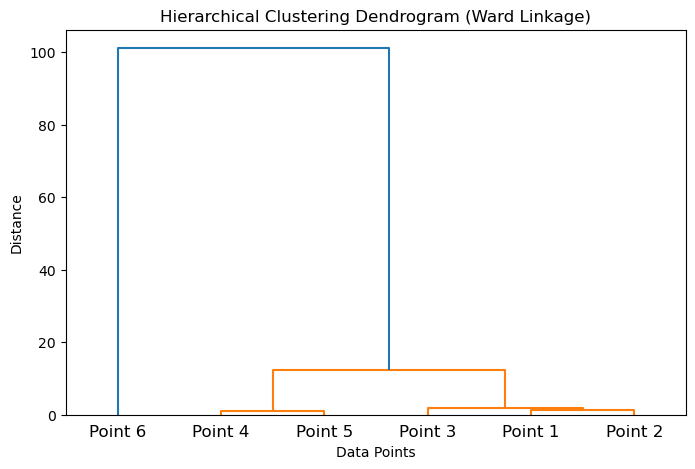

In [33]:
plt.figure(figsize=(8, 5))
dendrogram(linked,
           labels=[f"Point {i}" for i in range(1, len(X)+1)],  # Label points 
           distance_sort='ascending',  # Sort clusters by distance 
           show_leaf_counts=True)  # Show number of samples in each leaf 

plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Linkage Method Comparison

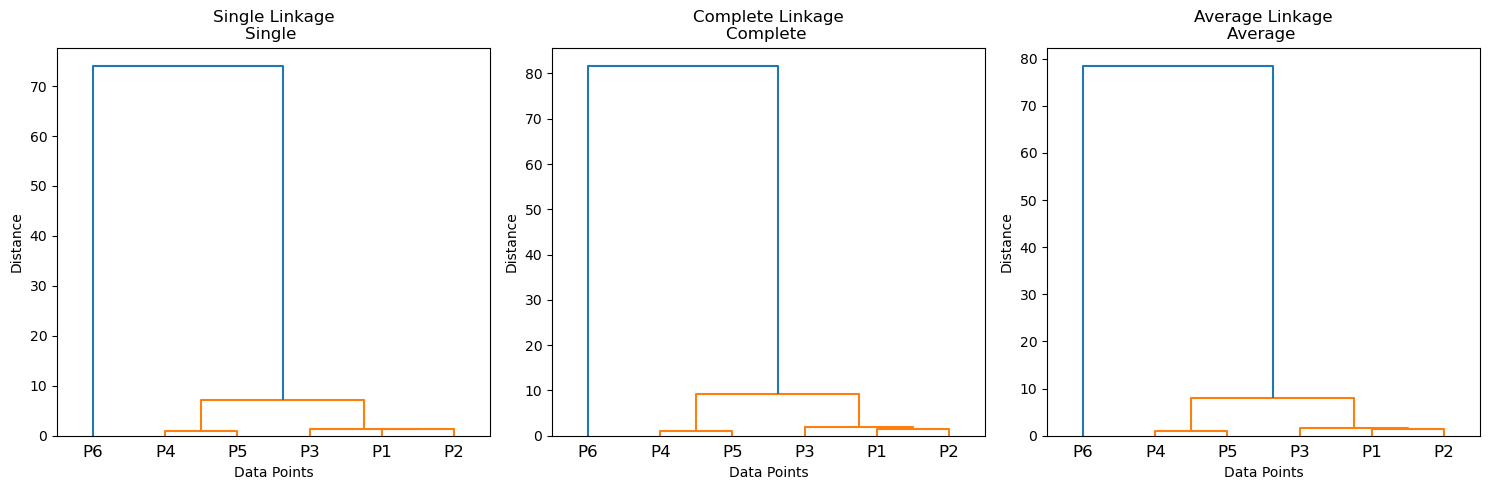

In [38]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ['single', 'complete', 'average']  # Linkage types

plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)  # Create subplot 
    linked = linkage(X, method=method)
    
    dendrogram(linked,
               labels=[f"P{i}" for i in range(1, len(X)+1)],
               distance_sort='ascending',
               show_leaf_counts=True)
    
    plt.title(f"{method.capitalize()} Linkage\n{method.capitalize()} ", fontsize=12)
    plt.xlabel("Data Points")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()

We use the same dataset (X) as in the Ward example.

**Three dendrograms are drawn side by side:**
- Single Linkage – Merges clusters based on the shortest distance between points.
- Complete Linkage – Uses the farthest distance between points.
- Average Linkage – Uses the average distance between all point pairs.

#  Clustering Performance Metrics
---

## Silhouette Score

Silhouette Score is used to measure the quality of a clustering result. It is computed for each data point and indicates how well the point fits within its own cluster compared to other clusters. The score ranges from -1 to +1. Values close to +1 indicate well-clustered data, values near 0 indicate overlapping clusters, and negative values indicate incorrect clustering.

---

## Adjusted Rand Index (ARI)

The Adjusted Rand Index is a metric used to compare two clustering results. It measures the similarity between true labels and predicted labels. Values close to 1 indicate high agreement, around 0 indicate random labeling, and negative values indicate poor agreement.

---

## Cophenetic Correlation Coefficient

The Cophenetic Correlation Coefficient measures how faithfully a hierarchical clustering dendrogram preserves the pairwise distances between the original data points. Values close to 1 indicate that the dendrogram accurately represents the data distances.


In [60]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

### Dataset

In [63]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

### Silhouette Score 

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.908


### Adjusted Rand Index 

In [71]:
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index: {ari:.3f}")

Adjusted Rand Index: 1.000


### Cophenetic Correlation Coefficient

In [74]:
Z = linkage(X, method='ward')  
coph_corr, coph_dists = cophenet(Z, pdist(X))
print(f"Cophenetic Correlation Coefficient: {coph_corr:.3f}")

Cophenetic Correlation Coefficient: 0.988


### Dendrogram Drawing

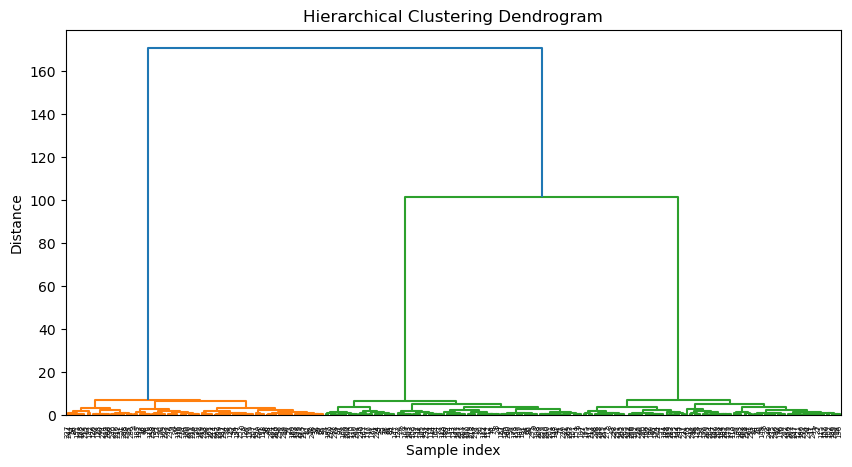

In [78]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

## Visualization with Simple Data  
We use `scipy.cluster.hierarchy` to draw dendrograms. Dendrograms show how data points merge step-by-step in hierarchical clustering. Changing the linkage method (single, complete, average, ward) affects cluster shapes and distances.


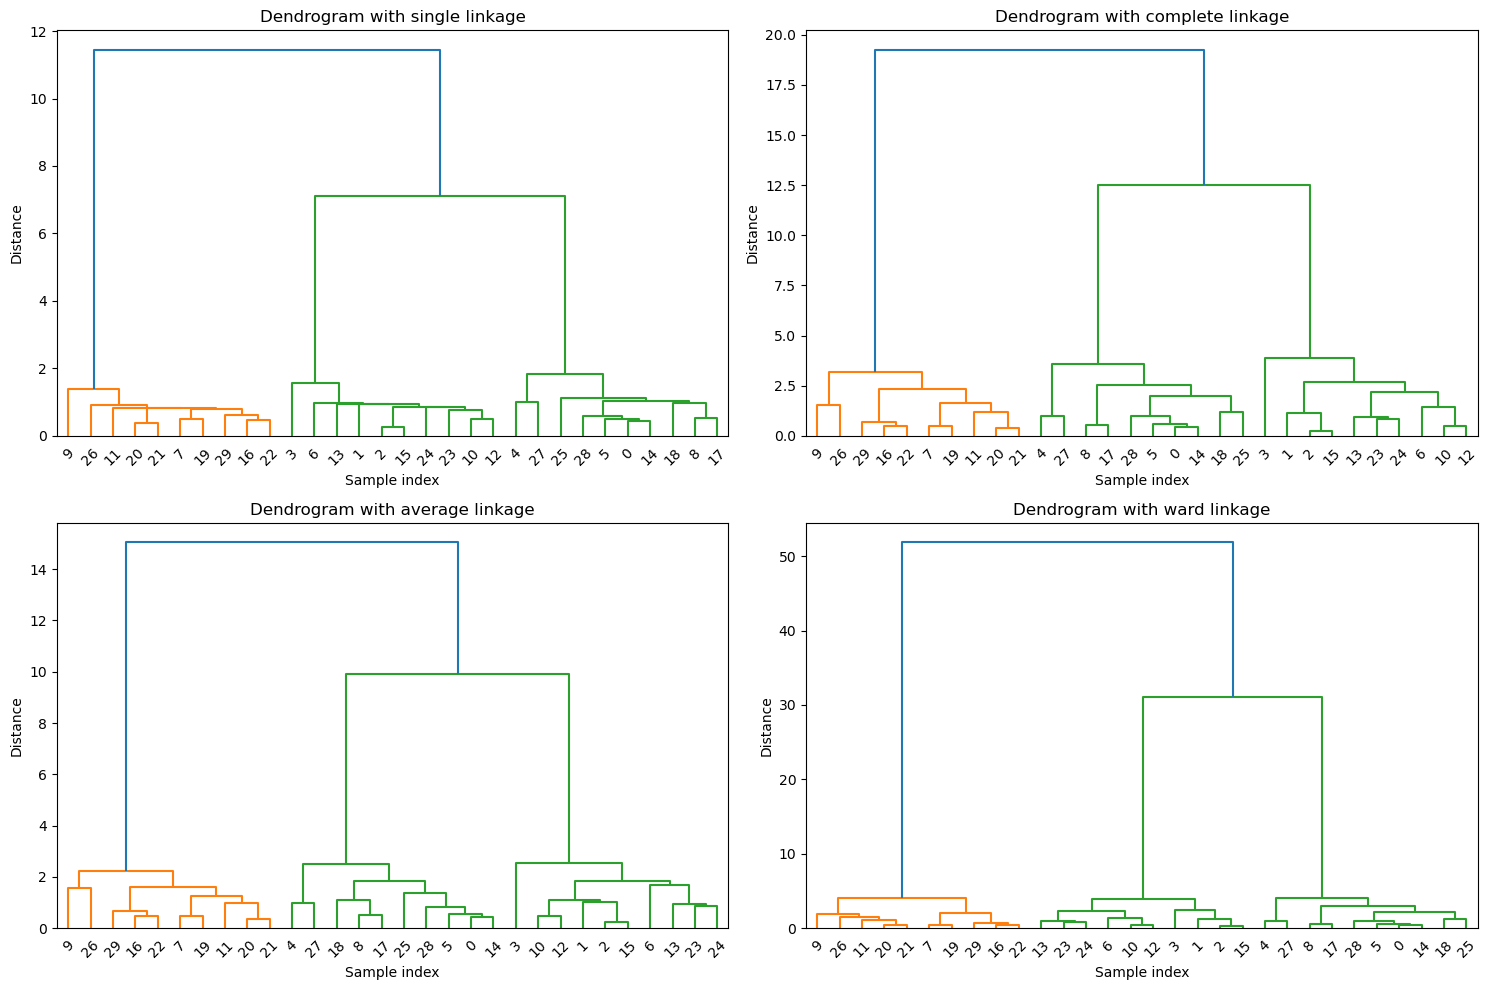

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=30, centers=3, cluster_std=1.0, random_state=42)


methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 10))

for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(X, method=method)
    dendrogram(Z)
    plt.title(f"Dendrogram with {method} linkage")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


##  Building Model with AgglomerativeClustering

Hierarchical clustering can also be performed using `AgglomerativeClustering` class from `sklearn.cluster`. It allows flexible configuration of linkage criteria and distance metrics.

- The `linkage` parameter controls how clusters are merged. Common options: `'ward'`, `'complete'`, `'average'`, `'single'`.
- The `affinity` parameter (or `metric` in newer versions) determines the distance metric (e.g., `'euclidean'`, `'manhattan'`, `'cosine'`).
- The `n_clusters` parameter sets how many clusters to form.
- Unlike dendrograms, this method directly assigns cluster labels to data points.

By testing different combinations of linkage and metric, you can observe how clustering results change.

---


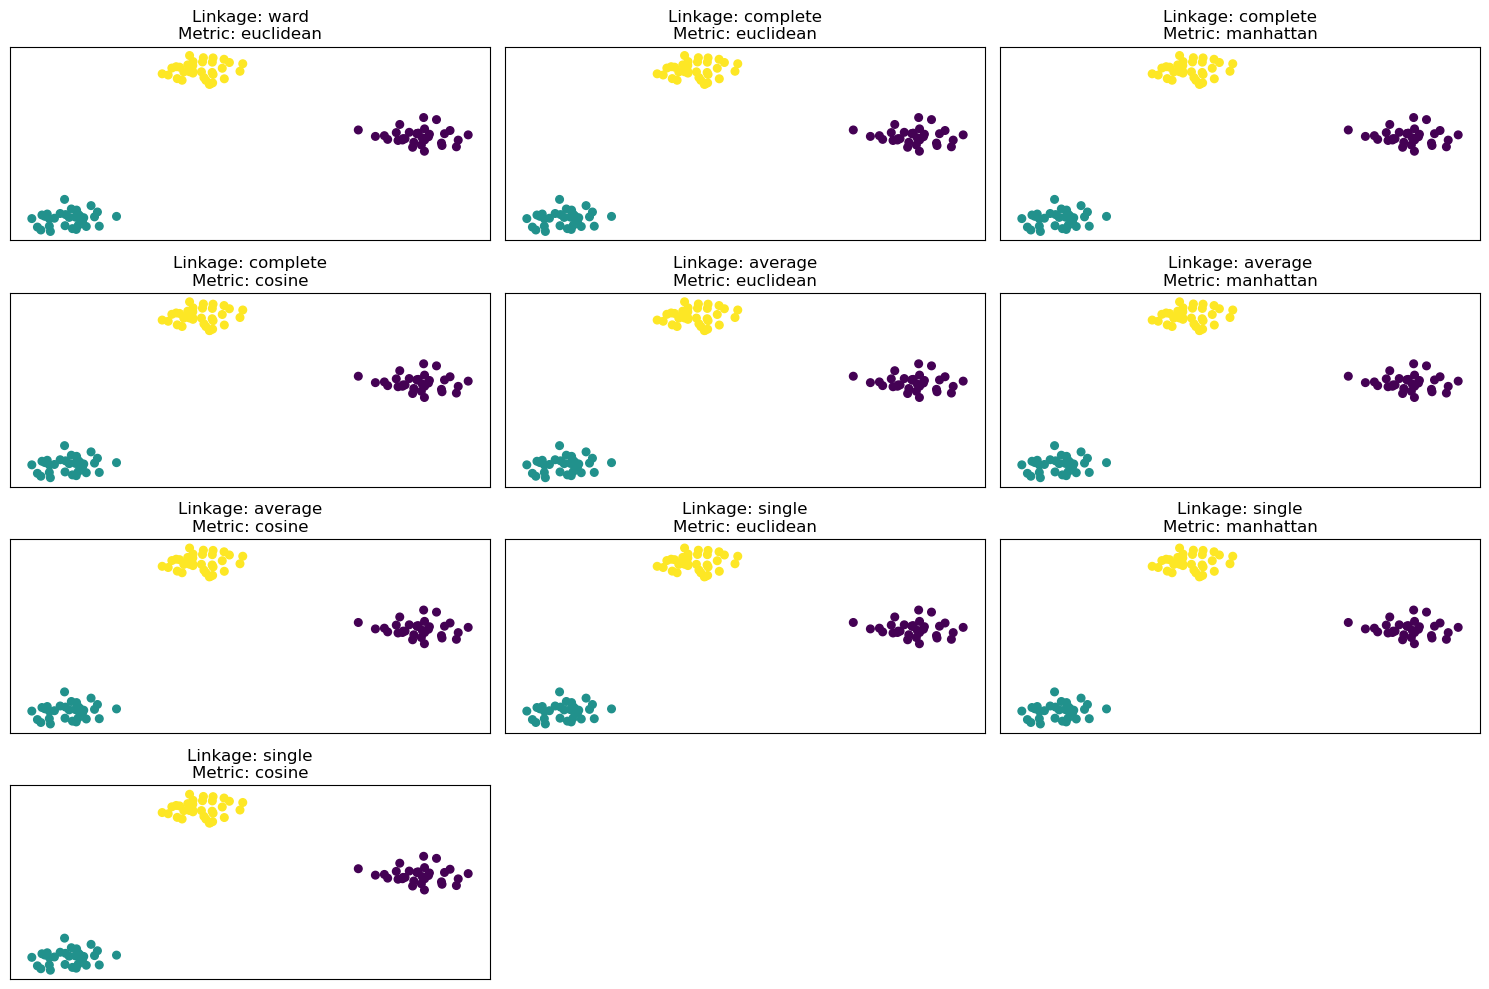

In [98]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.8, random_state=42)

linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'manhattan', 'cosine']

plt.figure(figsize=(15, 10))

plot_num = 1
for linkage in linkage_methods:
    for metric in distance_metrics:
        # Note: 'ward' linkage only supports 'euclidean' metric
        if linkage == 'ward' and metric != 'euclidean':
            continue
        
        clustering = AgglomerativeClustering(n_clusters=3, metric=metric, linkage='average')

        labels = clustering.fit_predict(X)

        plt.subplot(len(linkage_methods), len(distance_metrics), plot_num)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
        plt.title(f"Linkage: {linkage}\nMetric: {metric}")
        plt.xticks([])
        plt.yticks([])
        plot_num += 1

plt.tight_layout()
plt.show()

##  Determining Number of Clusters

Choosing the right number of clusters is crucial for meaningful hierarchical clustering results.

- **Dendrogram Cut-off:**  
  By visually inspecting the dendrogram, we can select a horizontal cut-off line (distance threshold). The number of vertical lines intersected by this cut defines the cluster count.

- **Cophenetic Correlation Coefficient (CCC):**  
  Measures how well the dendrogram preserves the original pairwise distances. Higher CCC (~1) means the dendrogram accurately represents the data structure, supporting the cluster solution.

- **Silhouette Score:**  
  Quantifies how similar each point is to its own cluster compared to other clusters. Helps to validate cluster count by picking the number that maximizes the silhouette score.

---



Cophenetic Correlation Coefficient: 0.989


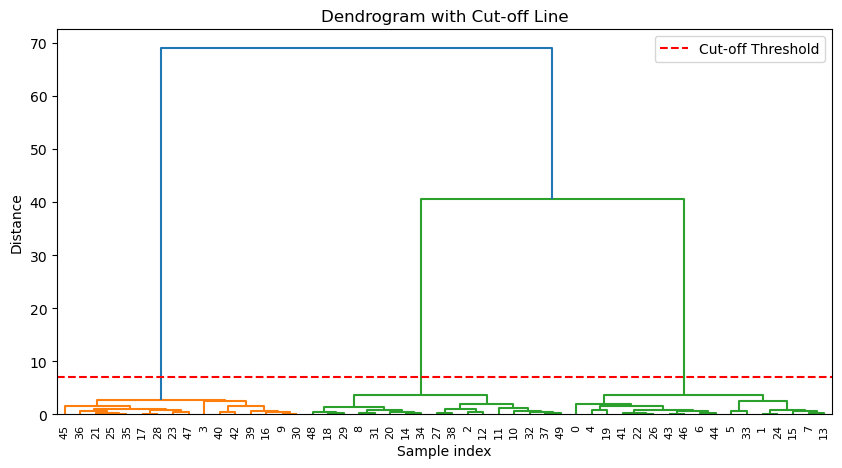

Silhouette Score: 0.897
Number of clusters found: 3


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate data
X, _ = make_blobs(n_samples=50, centers=3, cluster_std=0.7, random_state=42)

# Perform hierarchical clustering using Ward linkage
Z = linkage(X, method='ward')

# Calculate Cophenetic Correlation Coefficient
coph_corr, _ = cophenet(Z, pdist(X))
print(f"Cophenetic Correlation Coefficient: {coph_corr:.3f}")

# Plot dendrogram with cut-off line
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.axhline(y=7, color='r', linestyle='--', label='Cut-off Threshold')
plt.title("Dendrogram with Cut-off Line")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.legend()
plt.show()

# Get cluster labels using the cut-off distance
max_d = 7  # This value corresponds to the cut-off line height
labels = fcluster(Z, max_d, criterion='distance')

# Calculate silhouette score for the chosen cluster number
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.3f}")

# Optional: print number of clusters found
num_clusters = len(np.unique(labels))
print(f"Number of clusters found: {num_clusters}")

##  Testing Different Distance Metrics

In hierarchical clustering, the choice of distance metric greatly affects the cluster formation.

- Common distance metrics include:
  - **Euclidean:** Straight-line distance between points.
  - **Manhattan:** Sum of absolute differences along each dimension.
  - **Cosine:** Measures the cosine of the angle between vectors (focuses on orientation, not magnitude).

- We will apply hierarchical clustering using these metrics on the same dataset and compare the results.

- To quantitatively evaluate clustering performance, we use:
  - **Adjusted Rand Index (ARI):** Measures similarity between predicted and true labels.
  - **Normalized Mutual Information (NMI):** Measures shared information between clusterings.
  - **Silhouette Score:** Measures how well-separated clusters are.

---



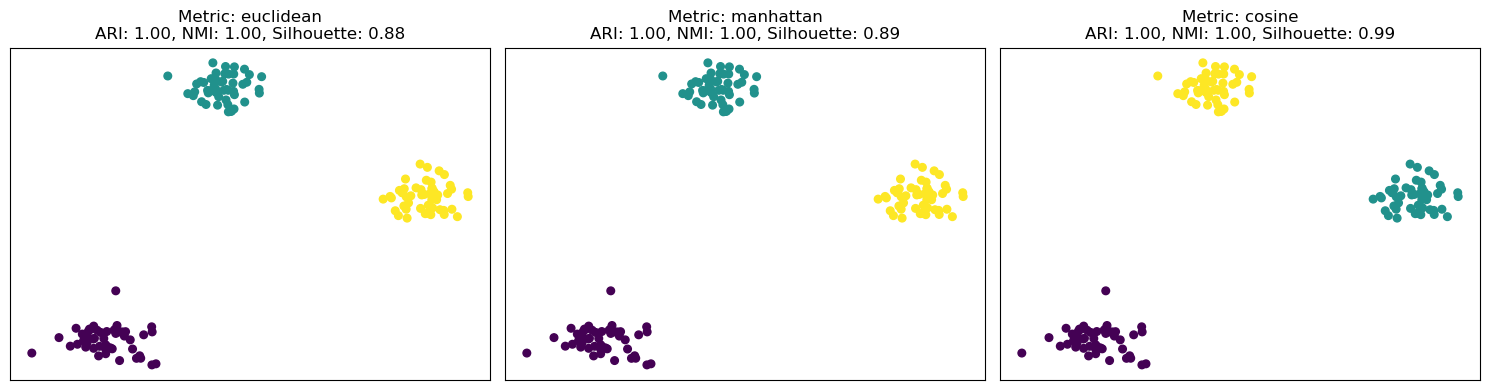

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Create sample data with true labels
X, y_true = make_blobs(n_samples=150, centers=3, cluster_std=0.8, random_state=42)

# Distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine']

results = []

plt.figure(figsize=(15, 4))

for i, metric in enumerate(distance_metrics, 1):
    clustering = AgglomerativeClustering(n_clusters=3, metric=metric, linkage='average')

    labels = clustering.fit_predict(X)
    
    ari = adjusted_rand_score(y_true, labels)
    nmi = normalized_mutual_info_score(y_true, labels)
    sil = silhouette_score(X, labels, metric=metric)
    
    results.append((metric, ari, nmi, sil))
    
    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(f"Metric: {metric}\nARI: {ari:.2f}, NMI: {nmi:.2f}, Silhouette: {sil:.2f}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

In [100]:
# Print summary of results
print("Distance Metric Evaluation:")
for metric, ari, nmi, sil in results:
    print(f"{metric.capitalize():<10} -> ARI: {ari:.3f}, NMI: {nmi:.3f}, Silhouette: {sil:.3f}")

Distance Metric Evaluation:
Euclidean  -> ARI: 1.000, NMI: 1.000, Silhouette: 0.876
Manhattan  -> ARI: 1.000, NMI: 1.000, Silhouette: 0.887
Cosine     -> ARI: 1.000, NMI: 1.000, Silhouette: 0.987


#  Comparative Analysis

In this section, we compare three popular clustering methods:

- **Hierarchical Clustering**
- **K-Means Clustering**
- **DBSCAN**

---

## Key Comparison Points


### 1. Need for Number of Clusters
- **Hierarchical:** Does not require pre-defining the number of clusters (can decide after dendrogram inspection).
- **K-Means:** Requires specifying the number of clusters beforehand.
- **DBSCAN:** Does not require number of clusters; finds clusters based on density.


### 2. Robustness to Noise and Outliers
- **Hierarchical:** Sensitive to noise and outliers, especially single linkage.
- **K-Means:** Sensitive to noise; outliers can skew cluster centers.
- **DBSCAN:** Robust to noise; can label outliers as noise points.

### 3. Computational Complexity
- **Hierarchical:** Typically O(n²), can be slow for large datasets.
- **K-Means:** O(nkt) where n = samples, k = clusters, t = iterations; generally faster.
- **DBSCAN:** Approximately O(n log n), efficient for large datasets with indexing.


### 4. Advantages and Disadvantages Table

| Method       | Advantages                              | Disadvantages                       |
|--------------|---------------------------------------|-----------------------------------|
| Hierarchical | No need to specify cluster count; dendrogram offers insights | High computational cost; sensitive to noise |
| K-Means      | Fast and simple; good for spherical clusters | Needs cluster count; sensitive to initialization and noise |
| DBSCAN       | Finds arbitrarily shaped clusters; handles noise well | Needs parameter tuning; struggles with varying densities |

---

# Comparative Analysis — Example with Code and Visualization

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

Dataset :D

In [114]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

### Define and Train Models

In [117]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Hierarchical (Agglomerative)
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
agglo_labels = agglo.fit_predict(X)

# DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)

### Performance Metrics

In [124]:
models = {
    'K-Means': kmeans_labels,
    'Hierarchical': agglo_labels,
    'DBSCAN': dbscan_labels
}


In [126]:
print("Model Performance Metrics:")
for name, labels in models.items():
    ari = adjusted_rand_score(y_true, labels)
    try:
        sil = silhouette_score(X, labels)
    except:
        sil = float('nan')
    print(f"{name:12s} -> ARI: {ari:.3f}, Silhouette Score: {sil:.3f}")

Model Performance Metrics:
K-Means      -> ARI: 1.000, Silhouette Score: 0.908
Hierarchical -> ARI: 1.000, Silhouette Score: 0.908
DBSCAN       -> ARI: 0.949, Silhouette Score: 0.832


### Visualization

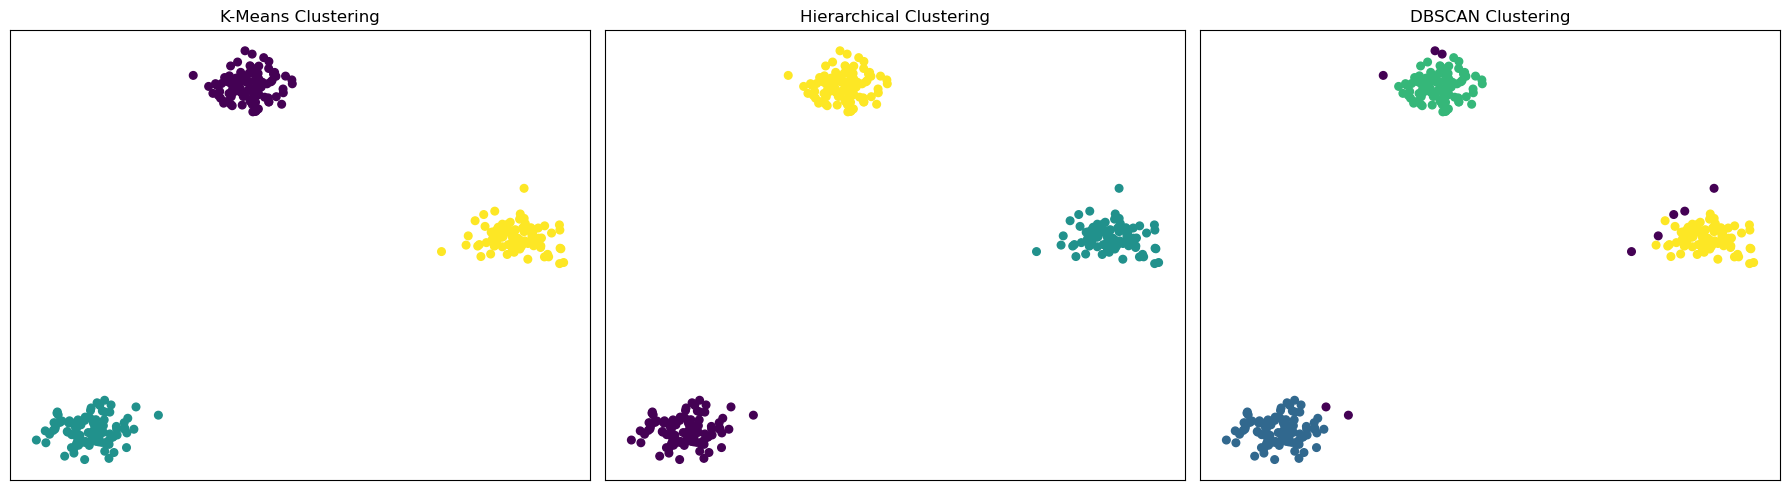

In [129]:
plt.figure(figsize=(18, 5))

for i, (name, labels) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(f"{name} Clustering")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

### Explanations:

- **K-Means:** Requires the number of clusters beforehand. It is fast and optimizes cluster centers by minimizing within-cluster variance.
- **Hierarchical (Agglomerative):** Also requires specifying the number of clusters, but you can visually inspect the dendrogram to help decide this number.
- **DBSCAN:** Does not require the number of clusters in advance. It separates noise points (labeled as -1) and forms clusters based on density.

---

### Results:

- The code outputs **Adjusted Rand Index (ARI)** and **Silhouette Score** for each clustering method, providing quantitative measures of clustering quality.
- The plots visualize how clusters are distributed across the data points for each algorithm.
- These metrics and visualizations help in understanding the strengths and weaknesses of each clustering method on the given dataset.


---

##  Contact

Thank you for reading this notebook on **Hierarchical Clustering – Advanced Concepts, Theory & Implementation**.  
If you'd like to connect, collaborate, or ask any questions, feel free to reach out through the following platforms:

-  **Researcher**: Mahmut Esat KOLAY - Candidate Computer Engineer 
-  [LinkedIn](https://www.linkedin.com/in/mahmutesatkolay)  
-  [GitHub](https://github.com/MEK-0)  
-  **Email**: esat.kolay19@gmail.com

---

*This notebook is part of my learning journey in Machine Learning and Unsupervised Clustering. Stay tuned for more updates and projects!*
